# Случайные числа

## Случайность и её философский аспект

Всю классическую эпоху естественных наук преобладал [детерминизм](https://ru.wikipedia.org/wiki/%D0%94%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B8%D0%B7%D0%BC), согласно которому в окружающей нас реальности отсутствует элемент случайности, все процессы природы предопределены, а кажущаяся нам случайность обусловлена неполнотой наших знаний. Эту позицию очень хорошо иллюстрирует высказывание Эйнштейна "бог не играет в кости": если бы нам были с абсолютной точностью известны положение и скорость кубика в момент броска, то мы могли с абсолютной точностью рассчитать, на какую грань этот кубик приземлится. Согласно детерминизму тоже самое верно и о любой другой физической системе, ни в какой момент времени случайность не играет ни какой роли. 

С тех пор наука значительно продвинулась и детерминистическая картина мира сменилась на индетерминистическую. Например, квантовая механика предполагает фундаментальную роль вероятности в законах природы, процесс радиоактивного распада вещества моделируется законами с вероятностной природой. Это приводит нас к тому, что так как случайность --- неотъемлемая составляющая окружающего нас мира, то иногда ученные вынужденны подстраивать методологию своих исследований в соответствии. 

Кроме физики случайные модели используются также для анализа экономических/социальных процессов, теории игр, в численных методах типа Монте-Карло и в других областях деятельности человека. Также многие методы криптографии опираются на элементы случайности, что добавляет информационную безопасность в ту же категорию. Это всё приводит нас к необходимости генерации случайных чисел.

```{note}
Если вас интересует философская сторона вопроса, то автор курса рекомендует к прочтению статью "Об облаках и часах" Карла Поппера. 
```

## Псевдослучайность

Итак, согласно современным физическим теориям можно получать поистине случайные числа, наблюдая, например, за квантовыми системами или за процессом радиоактивного распада. Однако получение случайных чисел таким образом оказывается очень трудоемким процессом. В связи с этим вместо случайных числе на практике используют **псевдослучайные**.

Последовательность чисел называется **псевдослучайной**, если она является результатом **детерминированных и воспроизводимых** вычислений, но по её статистическим свойствам она **похожа на случайную**. 

В качестве примера сгенерируем три псевдослучайных числа. За генерацию псевдослучайных чисел в `python` отвечает модуль [random](https://docs.python.org/3/library/random.html). Вызов функции [random.random](https://docs.python.org/3/library/random.html#random.random) генерирует одно действительное псевдослучайное число в полуинтервале $[0, 1)$. 

In [4]:
import random

def random_numbers(n):
    result = []
    for i in range(n):
        result.append(random.random())
    return result

x = random_numbers(5)
print(x)

[0.8921795677048454, 0.08693883262941615, 0.4219218196852704, 0.029797219438070344, 0.21863797480360336]


Выше написана функция `random_numbers`, которая генерирует список из $n$ псевдослучайных чисел. Эта функция используется для того, чтобы получить последовательность из 5 псевдослучайных чисел. 

Если анализировать эту последовательность, то в ней практически невозможно обнаружить закономерность. В этом и заключается "похожесть на случайность": хорошо сгенерированную последовательность псевдослучайных чисел сложно (практически невозможно) отличить от последовательности поистине случайных чисел. Именно это и позволяет заменить случайные числа на псевдослучайные на практике.

```{note}
За последние десятилетия разработано огромное количество алгоритмов генерации псевдослучайных чисел. Однако все они имеют ограничения на длину последовательности: все генераторы псевдослучайных чисел склоны зацикливаться. Это значит, что средствами компьютера можно сгенерировать лишь ограниченное количество псевдослучайных чисел. Цикл генератора псевдослучайных чисел в `python` составляет $2^{19937}-1$, чего хватает во многих случаях.    
```

Теперь проиллюстрируем, что псевдослучайные числа все же отличаются от случайных тем, что они являются результатом детерминированных и воспроизводимых вычислений. Это значит, что мы можем запомнить состояние генератора псевдослучайных чисел, сгенерировать последовательность чисел, вернуться к запомненному состоянию, сгенерировать ещё одну последовательность, и в итоге две сгенерированные последовательности в точности совпадут. Код в ячейке ниже иллюстрирует этот факт.     

In [5]:
state = random.getstate()
y = random_numbers(5)
print(y)

random.setstate(state)
z = random_numbers(5)
print(z)

[0.5053552881033624, 0.026535969683863625, 0.1988376506866485, 0.6498844377795232, 0.5449414806032167]
[0.5053552881033624, 0.026535969683863625, 0.1988376506866485, 0.6498844377795232, 0.5449414806032167]


С генератором настоящих случайных чисел такое невозможно принципиально, иначе эти числа нельзя считать случайными. 

Итого, генератор псевдослучайных чисел генерирует ограниченную последовательность чисел детерминированным и воспроизводимым образом, которую практически невозможно отличить статистическими методами от последовательности поистине случайных чисел.

## Генерация псевдослучайных чисел в `Python`

### `Python` vs. `NumPy`

Помимо [random.random](https://docs.python.org/3/library/random.html#random.random) модуль [random](https://docs.python.org/3/library/random.html) стандартной библиотеки `python` содержит большое количество других методов, генерирующих псевдослучайные числа, например, из нормального, экспоненциального, дискретных и многих других распределений. Однако все эти методы генерируют одно число за раз. 

Если вы и так уже работаете с `NumPy`, то для генерации псевдослучайных чисел практичнее воспользоваться средствами модуля `numpy.random` библиотеки `NumPy`. Все методы генерации псевдослучайных чисел в `NumPy` по умолчанию генерируют одно число, но каждый из них имеет опциональный параметр `size`, который позволяет сгенерировать сразу массив случайных чисел. Например, следующий код генерирует сразу 5 случайных чисел в диапазоне от 0 до 1 однократным вызовом метода [random](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html).

In [1]:
import numpy as np

x = np.random.random(size=5)
print(x)

[0.04141397 0.75445848 0.32970949 0.02252289 0.37250459]


Кроме того стоит отметить, что в `NumPy` представлен гораздо более широкий набор распределений, чем в модуле `random` стандартной библиотеки `python`.

|                                                  | `Python` | `NumPy` |
|--------------------------------------------------|----------|---------|
| Количество методов для генерации случайных чисел | 20       | 45      |


### Рекомендуемый способ генерации случайных чисел в `NumPy`

В ячейке выше метод [random](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html) вызывается непосредственно от модуля `numpy.random`. Однако разработчики `NumPy` рекомендуют не пользоваться методами модуля `numpy.random` непосредственно, а создавать объект генератора случайных чисел и вызывать методы генерации случайных чисел от него. 

Самый естественный способ создания объекта генератора случайных чисел --- метод [numpy.random.default_rng](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng).

In [2]:
rng = np.random.default_rng()

После того, как этот объект создан, его методы используются для генерации псевдослучайных чисел.  Например, чтобы сгенерировать 5 случайных чисел из диапазона $[0, 1)$, можно вызвать всё тот же метод [random](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html), но уже от объекта генератора.

In [4]:
x = rng.random(size=5)
print(x)

[0.49369384 0.12444763 0.50894611 0.10088895 0.80572941]


## Распределения 

Чаще всего приходится иметь дело со случайными величинами двух типов: дискретные случайные велины и абсолютно непрерывные случайные величины. 

### Дискретные случайные величины 

[Дискретная случайная величина](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%81%D0%BA%D1%80%D0%B5%D1%82%D0%BD%D0%B0%D1%8F_%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D0%B0%D1%8F_%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B8%D0%BD%D0%B0) --- это случайная величина, множество значений которой конечно или счётно.

Самый простой пример такой величины --- подбрасывание монетки: существует два возможных исхода (орел и решка), которые равновероятны, если монетка идеально сбалансирована. Другой такой простой пример --- игральная кость, но в данном случае есть 6 равновероятных исходов. Если у случайной величины $\xi$ есть $n$ равновероятных исходов, то её распределение называют равномерным дискретным. 

Метод [integers](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers) позволяет моделировать, как раз такие случайные величины. Ниже демонстрируется, как можно применить этот метод, чтобы смоделировать подбрасывание игральной кости. 

In [58]:
from matplotlib import pyplot as plt
import numpy as np

def plot_discrete(generated, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize=(10, 6), layout="tight")
    values, appearances = np.unique(generated, return_counts=True)
    ax.tick_params(labelsize=14)
    ax.bar(values, appearances)
    ax.set_xlabel(xlabel, size=18)
    ax.set_ylabel(ylabel, size=18)
    ax.set_title(title, size=18)

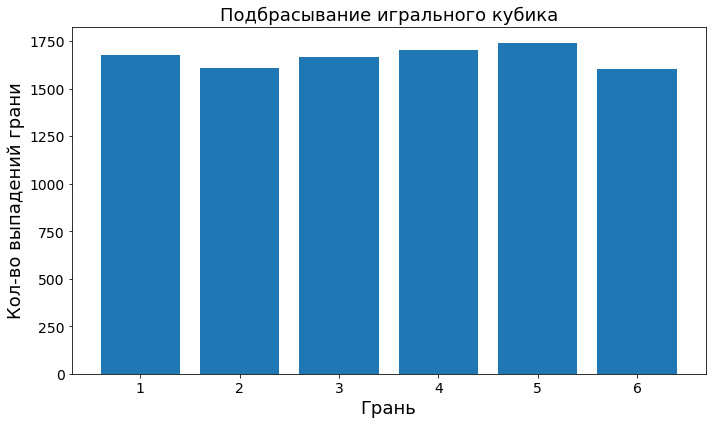

In [59]:
faces = rng.integers(low=1, high=6, endpoint=True, size=10000)
plot_discrete(faces, "Грань", "Кол-во выпадений грани", "Подбрасывание игрального кубика")

Видим, что по результатам 10000 подбрасываний игральной кости, все грани выпали приблизительно одинаковое количество раз. 

В каком-то смысле альтернативой является метод [choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice), который случайным образом несколько раз выбирает из коллекции один элемент. По умолчанию каждый элемент коллекции может попасть в итоговую выборку с одинаковой вероятностью и выбор осуществляется с повтором (один и тот же элемент исходной выборки может оказаться несколько раз в итоговой). Пример ниже моделирует подбрасывание монетки.  

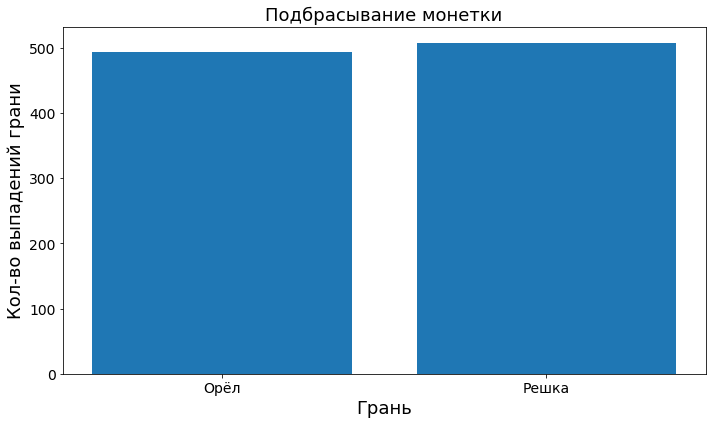

In [60]:
possible_outcomes = ["Орёл", "Решка"]
faces = rng.choice(possible_outcomes, size=1000)
plot_discrete(faces, "Грань", "Кол-во выпадений грани", "Подбрасывание монетки")

Однако вероятности выбора вовсе не обязательно должны быть равны между собой, т.е. распределение вероятностей может быть неравномерным. Например, [согласно википедии](https://ru.wikipedia.org/wiki/%D0%92%D0%BE%D0%B7%D0%B4%D1%83%D1%85) воздух на $78\%$ состоит из молекул азота, на $21\%$ из молекул кислорода и на $1\%$ из других газов. Это значит, что если случайным образом выбрать одну частицу из окружающей атмосферы, то с вероятностью 0.78 она окажется молекулой азота, с вероятностью 0.21 --- молекулой кислорода и с вероятностью 0.01 --- молекулой другого газа. 

Ниже демонстрируется, как можно моделировать такой случайный эксперимент средствами метода `choice`. Обратите внимание, на использование опционального параметра `p`.

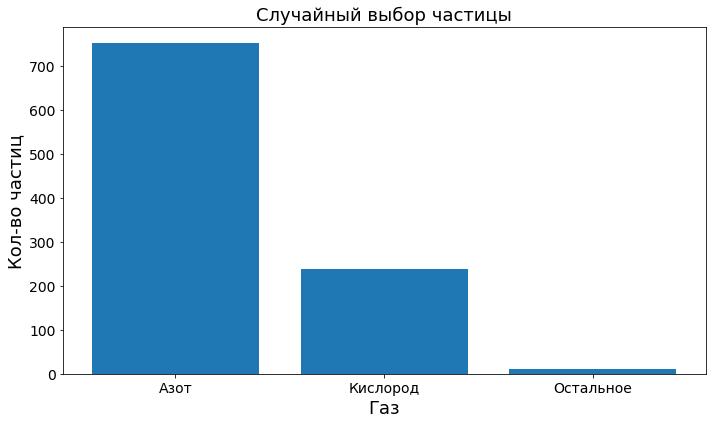

In [61]:
possible_outcomes = ["Азот", "Кислород", "Остальное"]
probabilities = np.array([0.78, 0.21, 0.01])
gases = rng.choice(possible_outcomes, p=probabilities, size=1000)
plot_discrete(gases, "Газ", "Кол-во частиц", "Случайный выбор частицы")

```{note}
У метода `choice` есть опциональный параметр `replace`, который отвечает за то, будет ли итоговая выборка содержать повторы или нет.
```

```{note}
В научной деятельности часто встречаются [биномиальное распределение](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html) (количество успехов в $n$ испытаниях) и [распределение Пуассона](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html).
``` 

### Абсолютно непрерывные случайные величины

Абсолютное непрерывные случайные величины --- второй распространенный класс случайных величин. Отличие непрерывной случайной величины от дискретных заключается в том, что они могут принимать значение в непрерывном диапазоне чисел. Мы уже рассматривали метод [random](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html), который генерирует случайные числа из диапазона $[0, 1)$. 

In [88]:
def plot_continuous(generated, x_min, x_max, nbins, title):
    fig, ax = plt.subplots(figsize=(10, 6), layout="tight")
    ax.hist(generated, range=(x_min, x_max), bins=nbins)
    ax.tick_params(labelsize=18)
    ax.set_xlabel("$x$", size=18)
    ax.set_ylabel("$y$", size=18)
    ax.set_title(title, size=18)

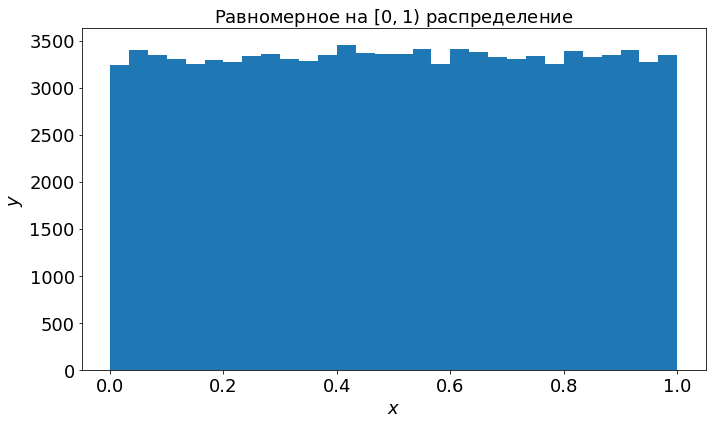

In [89]:
numbers = rng.random(size=100_000)
plot_continuous(numbers, 0, 1, 30, "Равномерное на $[0, 1)$ распределение")

На самом деле такое распределение является частным случаем [равномерного распределения](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D0%BF%D1%80%D0%B5%D1%80%D1%8B%D0%B2%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B2%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5), с нижней границей равной нулю и верхней --- единице. Метод [uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html) позволяет генерировать случайную величину, равномерно распределенную на отрезке $[\mathrm{low}, \mathrm{high})$.

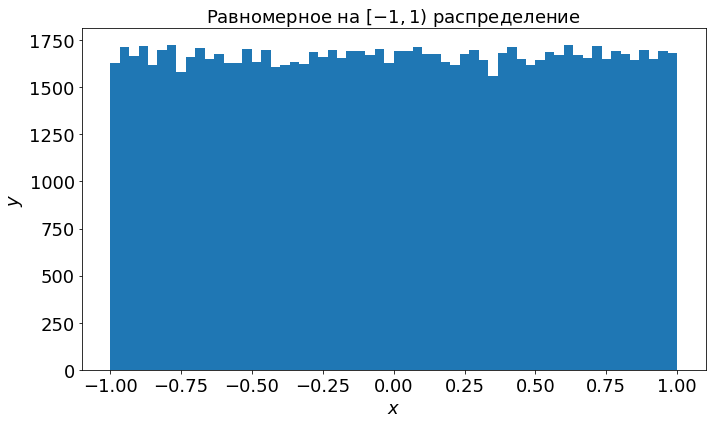

In [90]:
numbers = rng.uniform(size=100_000, low=-1, high=1)
plot_continuous(numbers, -1, 1, 60, "Равномерное на $[-1, 1)$ распределение")

При равномерном распределении случайная величина может оказаться с одинаковой вероятности внутри любой части отрезка ограниченной длины. Но на практике нередко приходится иметь дело и с совершенно другими распределениями. Например, случайная величина распределенная по [нормальному закону](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) может принимать любые значения, но чаще будет оказываться вблизи своего математического ожидания.  

Метод [normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html) позволяет генерировать числа согласно нормальному распределению. 

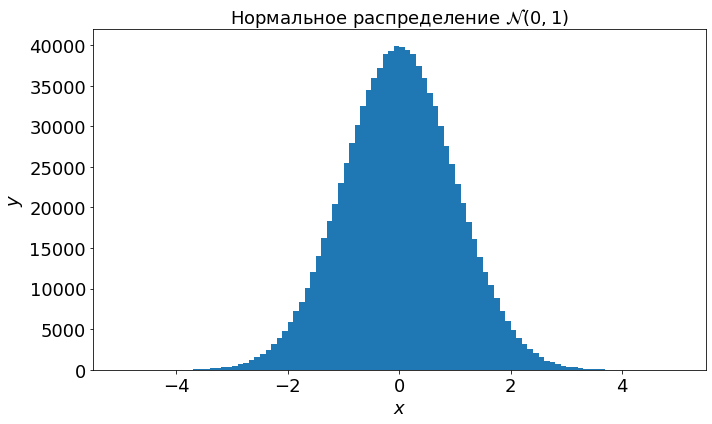

In [91]:
numbers = rng.normal(size=1_000_000)
plot_continuous(numbers, -5, 5, 100, r"Нормальное распределение $\mathcal{N}(0, 1)$")

Видим, что числа в районе 0 генерируются значительно чаще, чем вдали от 0. 

[Экспоненциальное распределение](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) определяет случайные величины, которые могут принимать значения на луче $[0, \infty)$. В `NumPy` за него отвечает метод [exponential](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html).

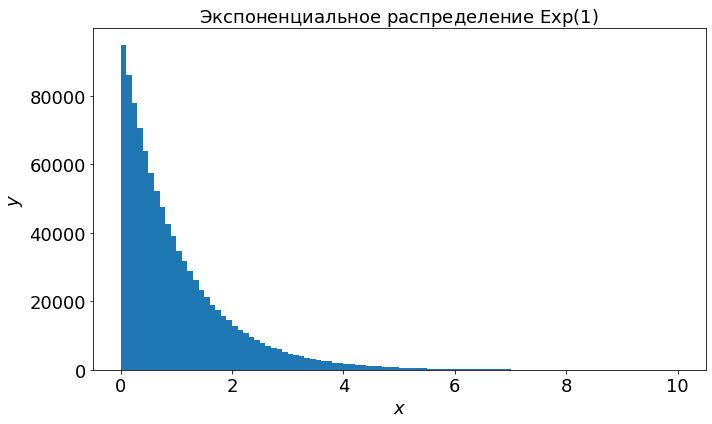

In [98]:
numbers = rng.exponential(size=1_000_000)
plot_continuous(numbers, 0, 10, 100, r"Экспоненциальное распределение $\mathrm{Exp}(1)$")

Все доступные в `NumPy` распределения перечисленны по [ссылке](https://numpy.org/doc/stable/reference/random/generator.html#distributions). Ещё более широкий спектр распределений доступен в модуле [stats](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions) библиотеки [SciPy](https://scipy.org/).